# **Practice N° 2**
---
## **Problem 1**
### **Topic: Forecasting**

#**Problem 1**
NOTE: for the development of this point is needed the file: "sym-h.csv"

---

###**Work flow**

We'll follow the typical workflow of a machine learning software development project, this steps are:

- Data acquisition
- Plot and selecting subset of data
- Split data (train set, test set)
- Scale the data (normalize, standardize)
- Split de datos (sliding window)
- Modeling
- Forecasting and validation the models



## **Data acquisition**

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv("sym-h.csv")
print(df.head())
print(df.tail())

             timestamp        DATE          TIME  DOY  ASY-D  ASY-H  SYM-D  \
0  2007-01-01 00:00:00  2007-01-01  00:00:00.000    1    0.0    3.0   -6.0   
1  2007-01-01 00:01:00  2007-01-01  00:01:00.000    1    0.0    3.0   -7.0   
2  2007-01-01 00:02:00  2007-01-01  00:02:00.000    1    0.0    4.0   -7.0   
3  2007-01-01 00:03:00  2007-01-01  00:03:00.000    1    0.0    4.0   -7.0   
4  2007-01-01 00:04:00  2007-01-01  00:04:00.000    1    0.0    5.0   -7.0   

   SYM-H  
0    5.0  
1    5.0  
2    6.0  
3    5.0  
4    6.0  
                   timestamp        DATE          TIME  DOY  ASY-D  ASY-H  \
7364155  2020-12-31 23:55:00  2020-12-31  23:55:00.000  366   13.0   11.0   
7364156  2020-12-31 23:56:00  2020-12-31  23:56:00.000  366   12.0   11.0   
7364157  2020-12-31 23:57:00  2020-12-31  23:57:00.000  366   12.0   11.0   
7364158  2020-12-31 23:58:00  2020-12-31  23:58:00.000  366   12.0   11.0   
7364159  2020-12-31 23:59:00  2020-12-31  23:59:00.000  366   11.0   11.0   

  

## **Plot and selecting subset of data**

In [ ]:
# Obtención de toda la serie de tiempo de Sym-H
data = df["SYM-H"]
print(data)

0          5.0
1          5.0
2          6.0
3          5.0
4          6.0
          ... 
7364155    3.0
7364156    3.0
7364157    3.0
7364158    3.0
7364159    3.0
Name: SYM-H, Length: 7364160, dtype: float64


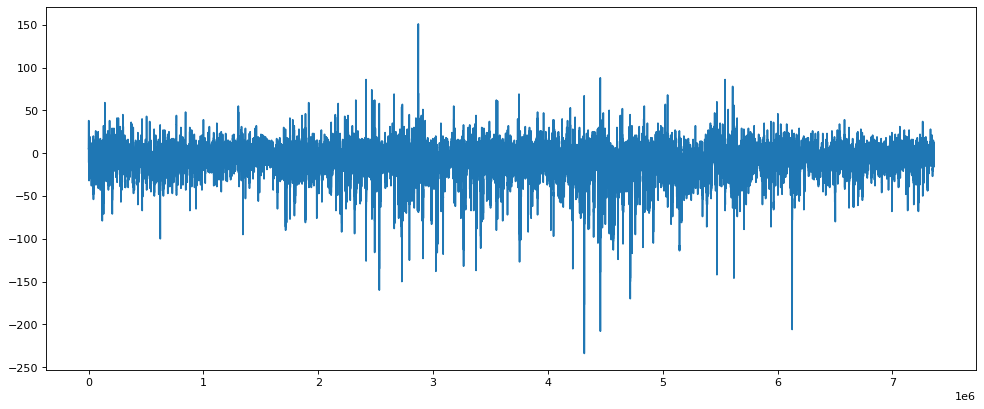

In [ ]:
# Graficar serie de tiempo
from matplotlib import pyplot as plt
#df.plot(x= df["timestamp"] , y=df["SYM-H"])
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(data)

<AxesSubplot:>

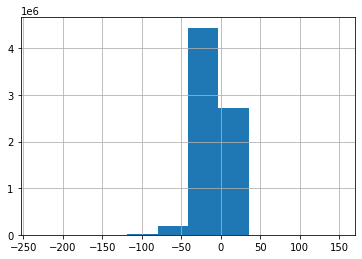

In [ ]:
data.hist()

In [ ]:
# seleccionar rango de datos
ddI = "01"
mmI = "02"
yyI = "2013"
yyImmIddI = str(yyI)+'-'+str(mmI)+'-'+str(ddI)
ddE = "01"
mmE = "03"
yyE = "2013"
yyEmmEddE = str(yyE)+'-'+str(mmE)+'-'+str(ddE)
dataReduced = df.loc[(df.timestamp >= yyImmIddI) & (df.timestamp <= yyEmmEddE)]
print(dataReduced)

                   timestamp        DATE          TIME  DOY  ASY-D  ASY-H  \
3201120  2013-02-01 00:00:00  2013-02-01  00:00:00.000   32   15.0   34.0   
3201121  2013-02-01 00:01:00  2013-02-01  00:01:00.000   32   14.0   34.0   
3201122  2013-02-01 00:02:00  2013-02-01  00:02:00.000   32   13.0   34.0   
3201123  2013-02-01 00:03:00  2013-02-01  00:03:00.000   32   13.0   35.0   
3201124  2013-02-01 00:04:00  2013-02-01  00:04:00.000   32   13.0   35.0   
...                      ...         ...           ...  ...    ...    ...   
3241435  2013-02-28 23:55:00  2013-02-28  23:55:00.000   59   24.0   63.0   
3241436  2013-02-28 23:56:00  2013-02-28  23:56:00.000   59   24.0   64.0   
3241437  2013-02-28 23:57:00  2013-02-28  23:57:00.000   59   23.0   64.0   
3241438  2013-02-28 23:58:00  2013-02-28  23:58:00.000   59   21.0   65.0   
3241439  2013-02-28 23:59:00  2013-02-28  23:59:00.000   59   21.0   65.0   

         SYM-D  SYM-H  
3201120    0.0  -10.0  
3201121    0.0  -10.0  
320

3201120   -10.0
3201121   -10.0
3201122   -10.0
3201123   -10.0
3201124   -10.0
           ... 
3241435   -26.0
3241436   -26.0
3241437   -27.0
3241438   -28.0
3241439   -28.0
Name: SYM-H, Length: 40320, dtype: float64


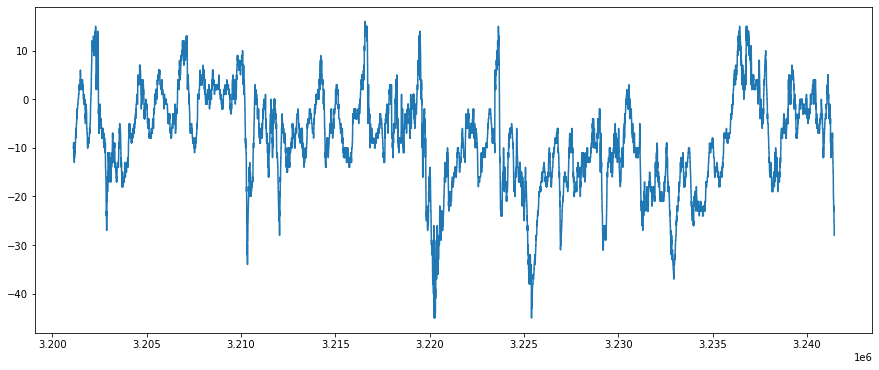

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(dataReduced["SYM-H"])
print(dataReduced["SYM-H"])

## **Split data (train set, test set)**
Divide the data in train set and test set taking into account the datetime column

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# seleccionar columna de sym-h
dataSet = dataReduced["SYM-H"]
print(dataSet.shape)

(40320,)


In [ ]:
# importante shuffle=False
data_train, data_test = train_test_split(dataSet,test_size=0.2, shuffle=False)

In [ ]:
print(data_train.shape)
print(data_test.shape)

(32256,)
(8064,)


## **Scale the data (normalize, standardize)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
'''
The fit(data) method is used to compute the mean and std dev for a given feature so that it can be used further for scaling.
The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.
The fit_transform() method does both fit and transform.
the inverse_transform method unscale the data

Data nrmalization
y = (x – min) / (max – min)

Data standarization
y = (x – mean) / standard_deviation
'''

'\nThe fit(data) method is used to compute the mean and std dev for a given feature so that it can be used further for scaling.\nThe transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.\nThe fit_transform() method does both fit and transform.\nthe inverse_transform method unscale the data\n\nData nrmalization\ny = (x – min) / (max – min)\n\nData standarization\ny = (x – mean) / standard_deviation\n'

In [ ]:
# generate scaler using train set
scaler = MinMaxScaler()
# transform data
data_train = data_train.to_numpy()
data_train = data_train.reshape(-1, 1)
data_train_scaled = scaler.fit_transform(data_train)
print(scaled)

[[0.57377049]
 [0.57377049]
 [0.57377049]
 ...
 [0.50819672]
 [0.50819672]
 [0.50819672]]


In [ ]:
# scaling test set using scaler based on train set
data_test = data_test.to_numpy()
data_test = data_test.reshape(-1, 1)
data_test_scaled = scaler.transform(data_test)

In [ ]:
# testing scaler
import numpy as np

y_new_inverse = scaler.inverse_transform(data_test_scaled)
print(y_new_inverse)

scaler.inverse_transform(np.array([0.50819672]).reshape(-1,1))

[[-14.]
 [-14.]
 [-14.]
 ...
 [-27.]
 [-28.]
 [-28.]]


array([[-14.00000008]])

## **Split data (sliding window)**

In [ ]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# split a univariate dataset into train/test sets
#def train_test_split(data, n_test):
#    return data[:-n_test], data[-n_test:]


In [ ]:
# define input sequence
raw_seq = data_train_scaled
# choose a number of time steps
n_steps_in, n_steps_out = 20, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# summarize the data
for i in range(len(X)):
    print(X[i], y[i])

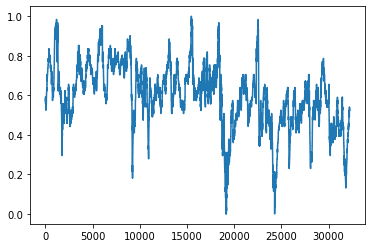

In [ ]:
# plot X 
plt.plot(X[:,0])

## **Modeling**

In [ ]:
# define model
model = Sequential()
model.add(Dense(100, activation='tanh', input_dim=n_steps_in))
model.add(Dense(n_steps_out))
model.compile(optimizer='adam', loss='mse')
# fit model
history = model.fit(X, y, epochs=5, validation_split=0.2, verbose=2)

Epoch 1/5
806/806 - 2s - loss: 0.0082 - val_loss: 2.8215e-04 - 2s/epoch - 2ms/step
Epoch 2/5
806/806 - 1s - loss: 3.1027e-04 - val_loss: 1.7420e-04 - 1s/epoch - 2ms/step
Epoch 3/5
806/806 - 2s - loss: 2.1844e-04 - val_loss: 1.5041e-04 - 2s/epoch - 2ms/step
Epoch 4/5
806/806 - 1s - loss: 1.9047e-04 - val_loss: 1.1964e-04 - 1s/epoch - 2ms/step
Epoch 5/5
806/806 - 1s - loss: 1.7577e-04 - val_loss: 1.0378e-04 - 1s/epoch - 2ms/step


{'loss': [0.008248260244727135, 0.00031026965007185936, 0.00021844430011697114, 0.00019046624947804958, 0.00017577469407115132], 'val_loss': [0.0002821499074343592, 0.00017419968207832426, 0.00015040539437904954, 0.00011963578435825184, 0.00010378418664913625]}


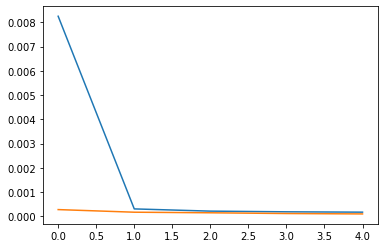

In [ ]:
print(history.history)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## **Forecasting and validation the models**

In [ ]:
yhat_1 = model.predict(data_test_scaled[0:20].reshape((1,-1)))
print(scaler.inverse_transform(yhat_1))


[[-13.000881 -12.830417]]


In [ ]:
from sklearn.metrics import mean_squared_error as mse

# calculando mse con datos escalados
print(yhat_1,data_test_scaled[20:22].reshape(1,-1))
mse1 = mse(yhat_1,data_test_scaled[20:22].reshape(1,-1))
print("mse = ", mse1)


# calculando mse con datos des escalados
yhatUnscaled = scaler.inverse_transform(yhat_1)
yTestUnscaled = scaler.inverse_transform(data_test_scaled[20:22].reshape(1,-1))
print(yhatUnscaled,yTestUnscaled)
mse2 = mse(yhat_1,data_test_scaled[20:22].reshape(1,-1))
print("mse = ", mse2)

#print(yhat_1.shape)
#print(data_test_scaled[20:22].shape)
#print(data_test_scaled[20:22].reshape(1,-1).shape)


[[0.5245757 0.5273702]] [[0.52459016 0.52459016]]
mse =  3.864444922533459e-06
[[-13.000881 -12.830417]] [[-13. -13.]]
mse =  3.864444922533459e-06
